## Kernel PCA

#### Business Problem

We have a data set of people and their estimated salary. We want to determine if they have purchased an SUV or not.
The original dataset in the original feature space is mapped to a higer dimension using Kernel Trick. The original dataset was not linearly seperable. But by performing this new mapping we made it possible to seperate the data lineraly. But this caused us to have more dimensions, Hence we apply PCA to perform dimensionality reduction.  

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
# Loading the dataset into variables
dataset = pd.read_csv('Social_Network_Ads.csv')
rows, columns = dataset.shape
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Checking the values of X and y
print("X Values")
print(["{0:0.2f}".format(i) for i in X[0,:]])
print("\nY Values")
print(y[:10])

X Values
['19.00', '19000.00']

Y Values
[0 0 0 0 0 0 0 1 0 0]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train Dimensions: ",X_train.shape)
print("X_test Dimensions: ",X_test.shape)

X_train Dimensions:  (320, 2)
X_test Dimensions:  (80, 2)


###### Applying Kernel PCA

In [7]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
print("X_train Dimensions: ",X_train.shape)
print("X_test Dimensions: ",X_test.shape)

X_train Dimensions:  (320, 2)
X_test Dimensions:  (80, 2)


In [8]:
# Fitting Logistic Regression to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test)
print("y_test Values:", y_test)                            
print("\ny_pred Values:", y_pred)

y_test Values: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]

y_pred Values: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54  4]
 [ 4 18]]


###### Visualising the Training set results

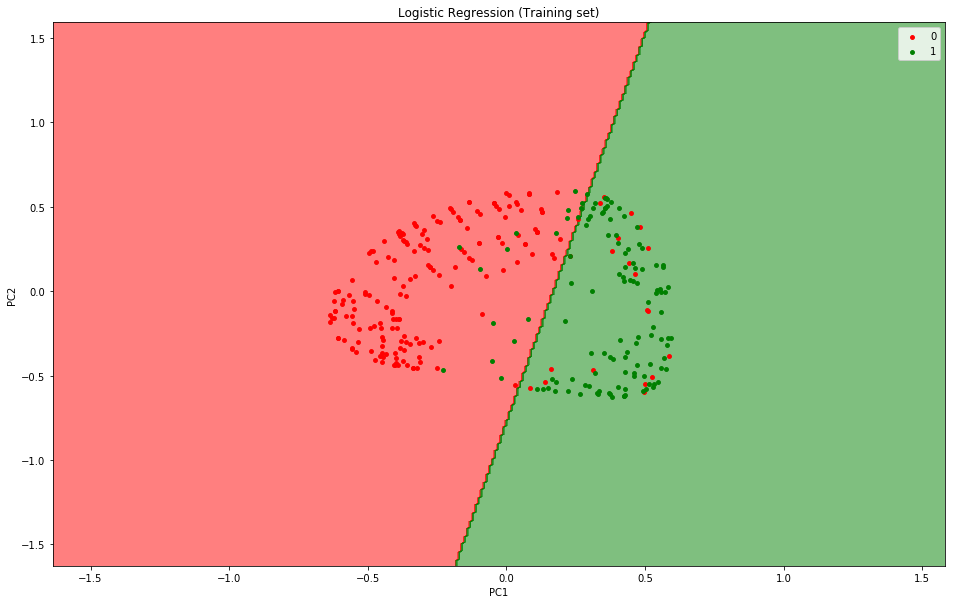

In [11]:
# This library helps us colorize our data points 
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = 16, 10
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
# This function makes the contour between the two regions.
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green')))
# Here we plot the graph values
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Here we print the actual values of the training set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j,s=15)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

###### Visualising the Test set results

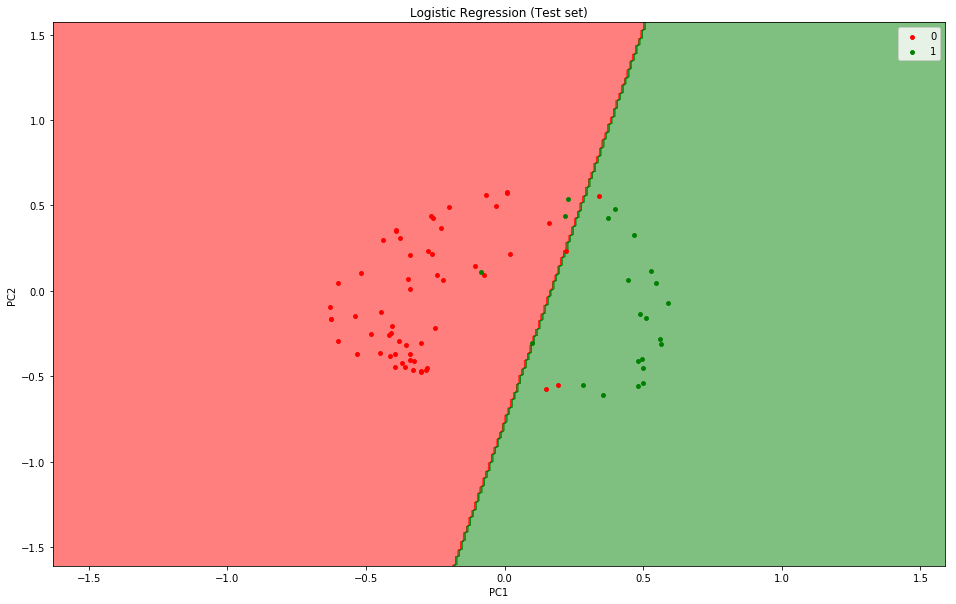

In [12]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j,s=15)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()